# Validation with Inference

Contact: Niko Sarcevic (GitHub: @nikosarcevic, email: nikolina.sarcevic@gmail.com)

Here we validate the inference of the IA models with the Skysim5000 data. We use the following models:
- NLA
- $\delta$NLA
- TT
- $\delta$TT
- HOD NLA
- HOD TT

We compare the inference of the IA models with the following targets:
- NLA with NLA and TATT
- $\delta$NLA with $\delta$NLA and TATT
- TT with TT and TATT
- $\delta$TT with $\delta$TT and TATT
- HOD NLA with $\delta$NLA and TATT
- HOD TT with TT, $\delta$TT, and TATT

We plot the triangle plots for the above combinations to compare the inference of the IA models with the Skysim5000 data.
Note that the triangle plots are generated using the `plot_triangle_combination` function in the `plot_handlers.py` script. This function is a wrapper for GetDist. It generates and saves a triangle plot comparing two or three samples dynamically. The function takes two or three sample keys as input and generates a triangle plot comparing the samples. The function also saves the figure as a PDF if the `save_fig` flag is set to `True`.
Sample keys are generated dynamically based on the IA models and targets (passed as strings).
For more information, refer to the `plot_handlers.py` script in the `helpers` directory.
The list of available keys are:
- `"NLA_with_NLA"`
- `"NLA_with_TATT"`
- `"deltaNLA_with_deltaNLA"`
- `"deltaNLA_with_TATT"`
- `"TT_with_TT"`
- `"TT_with_TATT"`
- `"deltaTT_with_deltaTT"`
- `"deltaTT_with_TATT"`
- `"HOD_NLA_with_deltaNLA"`
- `"HOD_NLA_with_TATT"`
- `"HOD_TT_with_TT"`
- `"HOD_TT_with_deltaTT"`
- `"HOD_TT_with_TATT"

You can also list the keys by running the following code snippet:
```python
import helpers.chains_processing as cp

samples = cp.samples
for key, value in samples.items():
    print(key)
    if isinstance(value, dict):
        for nested_key in value.keys():
            print(f"  {nested_key}")
```

Finally, the plots are saved in the `output/plots` directory, as .pdf files.



In [1]:
import matplotlib.pyplot as plt
import helpers.plot_handlers as ph
import  helpers.chains_processing as cp


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [2]:
samples = cp.samples  # import chains (processed and ready to go into getDist)
truth_values = cp.truth_values  # import truth values
labels = ph.labels  # get labels defined in plot_helpers
colors = ph.get_colors()  # get the color scheme define in plot_helpers
plot_path = ph.plot_path()  # get the output path where plots are going to be saved
g = ph.get_plot_settings()  # get the settings for getDist corner plots

## Plots

### NLA model

We first see if we can recover the NLA model with the NLA and TATT targets.

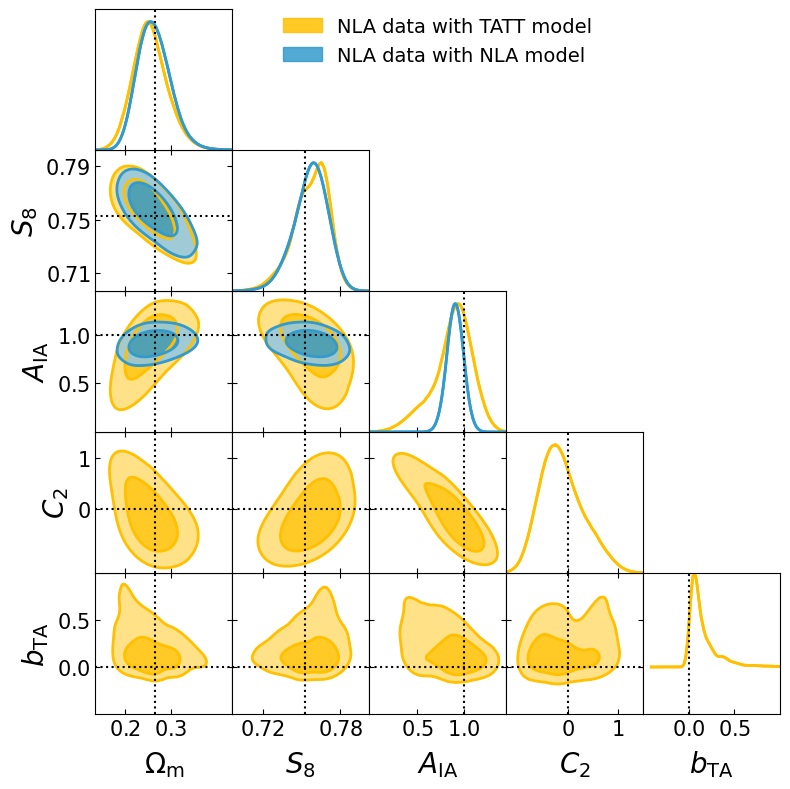

In [3]:
model1 = "NLA"  # define the first I model
model2 = "TATT"  # define the second IA model
# Make a string we can pass around
model1_str = f"{model1}_with_{model1}"
model2_str = f"{model1}_with_{model2}"

# Make lists with samples and colors
samples_list = [samples[model2_str]] * 2 + [samples[model1_str]] * 2
colors_list = [colors[model2_str]] * 2 +  [colors[model1_str]] * 2

# Define kwargs
kwargs = {
        'contour_colors': colors_list,
        "filled": [False, True] * (len(colors_list)),
        "contour_ls": ["-"] * len(colors_list),
        "contour_lws": [2] * len(colors_list),
    }

# Set labels
legend_labels = ["_nolegend_",
                 f"{model1} data with {model2} model",
                 "_nolegend_",
                 f"{model1} data with {model1} model",
                 ]

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[model1_str],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Adjust y-axis limits for the last row in the triangle plot
num_vars = len(g.subplots)  # Number of variables (square matrix)
last_row = g.subplots[-1]  # Access the last row of subplots

for ax in last_row:
    if ax is not None:  # Ensure the subplot exists
        ax.set_ylim(-0.5, 1.)  # Set the y-axis range

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.pdf", dpi=300)
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.png", dpi=300)

### $\delta$NLA model

Next, we look at the $\delta$NLA model with the $\delta$NLA and TATT targets.

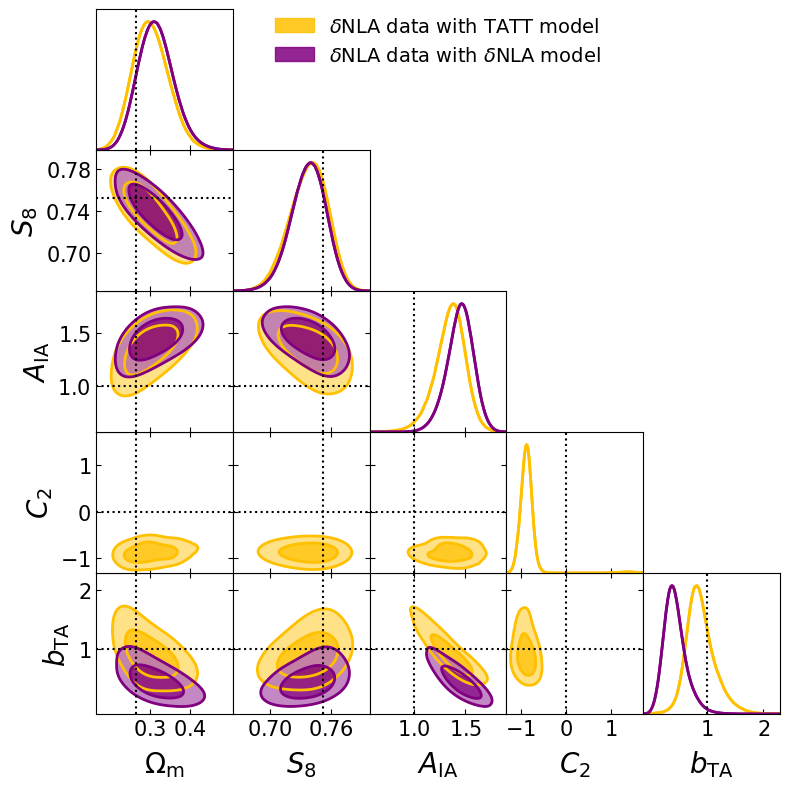

In [4]:
model1 = "deltaNLA"  # define the first I model
model2 = "TATT"  # define the second IA model
# Make a string we can pass around
model1_str = f"{model1}_with_{model1}"
model2_str = f"{model1}_with_{model2}"

# Make lists with samples and colors
samples_list = [samples[model2_str]] * 2 + [samples[model1_str]] * 2
colors_list = [colors[model2_str]] * 2 +  [colors[model1_str]] * 2

# Define kwargs
kwargs = {
        'contour_colors': colors_list,
        "filled": [False, True] * (len(colors_list)),
        "contour_ls": ["-"] * len(colors_list),
        "contour_lws": [2] * len(colors_list),
    }

# Set labels
legend_labels = ["_nolegend_",
                 f"$\delta$NLA data with {model2} model",
                 "_nolegend_",
                 f"$\delta$NLA data with $\delta$NLA model",
                 ]

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[model1_str],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.pdf", dpi=300)
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.png", dpi=300)


### TT model

Now, we examine the TT model with the TT and TATT targets.

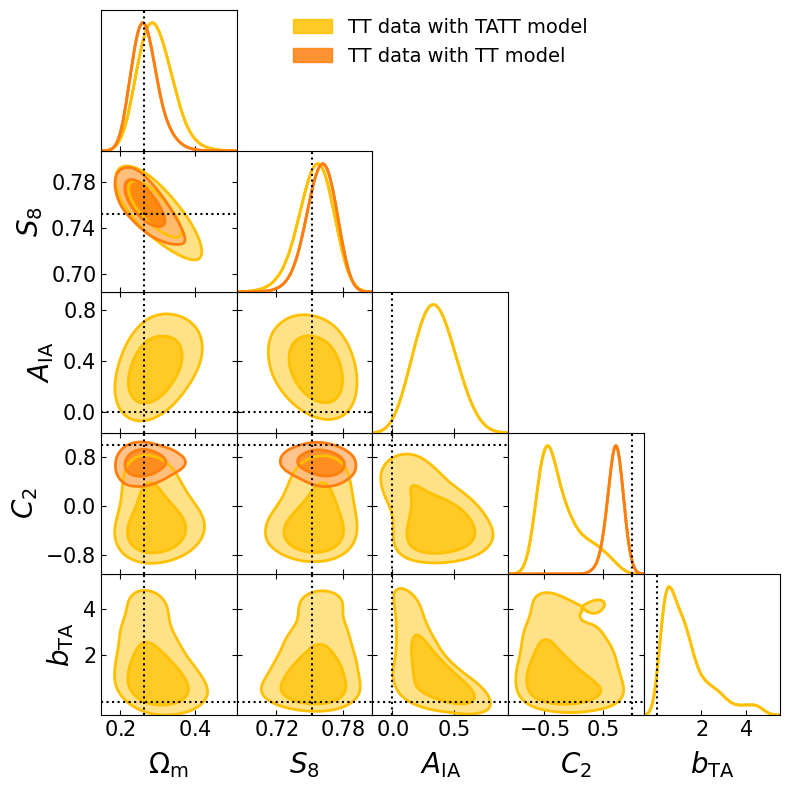

In [5]:
model1 = "TT"  # define the first I model
model2 = "TATT"  # define the second IA model
# Make a string we can pass around
model1_str = f"{model1}_with_{model1}"
model2_str = f"{model1}_with_{model2}"

# Make lists with samples and colors
samples_list = [samples[model2_str]] * 2 + [samples[model1_str]] * 2
colors_list = [colors[model2_str]] * 2 +  [colors[model1_str]] * 2

# Define kwargs
kwargs = {
        'contour_colors': colors_list,
        "filled": [False, True] * (len(colors_list)),
        "contour_ls": ["-"] * len(colors_list),
        "contour_lws": [2] * len(colors_list),
    }

# Set labels
legend_labels = ["_nolegend_",
                 f"{model1} data with {model2} model",
                 "_nolegend_",
                 f"{model1} data with {model1} model",
                 ]

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[model1_str],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.pdf", dpi=300)
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.png", dpi=300)


### $\delta$TT model

We then analyze the $\delta$TT model with the $\delta$TT and TATT targets.

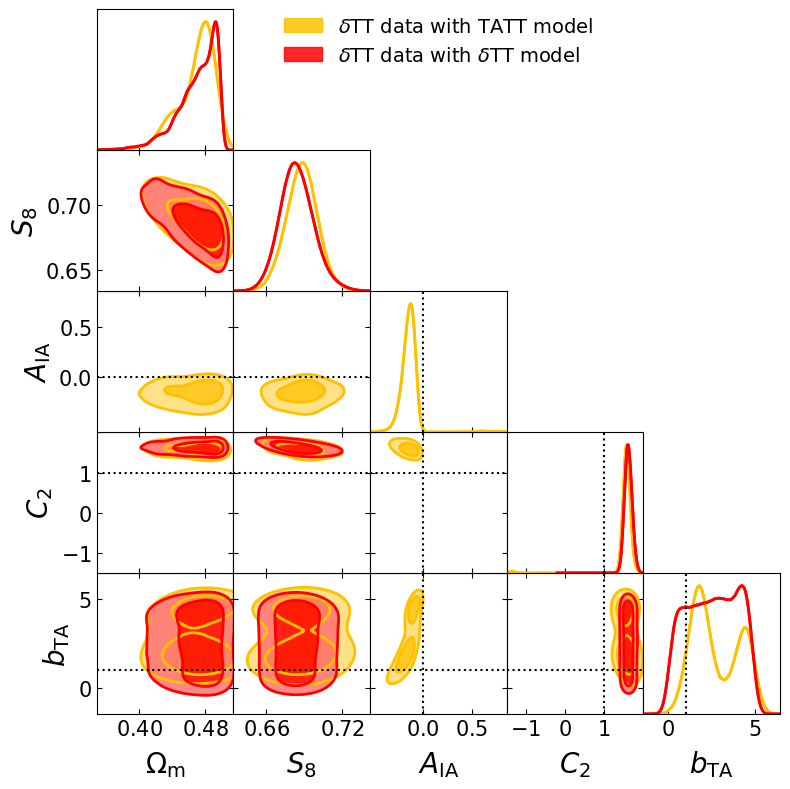

In [6]:
model1 = "deltaTT"  # define the first I model
model2 = "TATT"  # define the second IA model
# Make a string we can pass around
model1_str = f"{model1}_with_{model1}"
model2_str = f"{model1}_with_{model2}"

# Make lists with samples and colors
samples_list = [samples[model2_str]] * 2 + [samples[model1_str]] * 2
colors_list = [colors[model2_str]] * 2 +  [colors[model1_str]] * 2

# Define kwargs
kwargs = {
        'contour_colors': colors_list,
        "filled": [False, True] * (len(colors_list)),
        "contour_ls": ["-"] * len(colors_list),
        "contour_lws": [2] * len(colors_list),
    }

# Set labels
legend_labels = ["_nolegend_",
                 f"$\delta$TT data with {model2} model",
                 "_nolegend_",
                 f"$\delta$TT data with $\delta$TT model",
                 ]

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[model1_str],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.pdf", dpi=300)
plt.savefig(f"{plot_path}{model1}_with_{model1}_and_{model2}_combo.png", dpi=300)


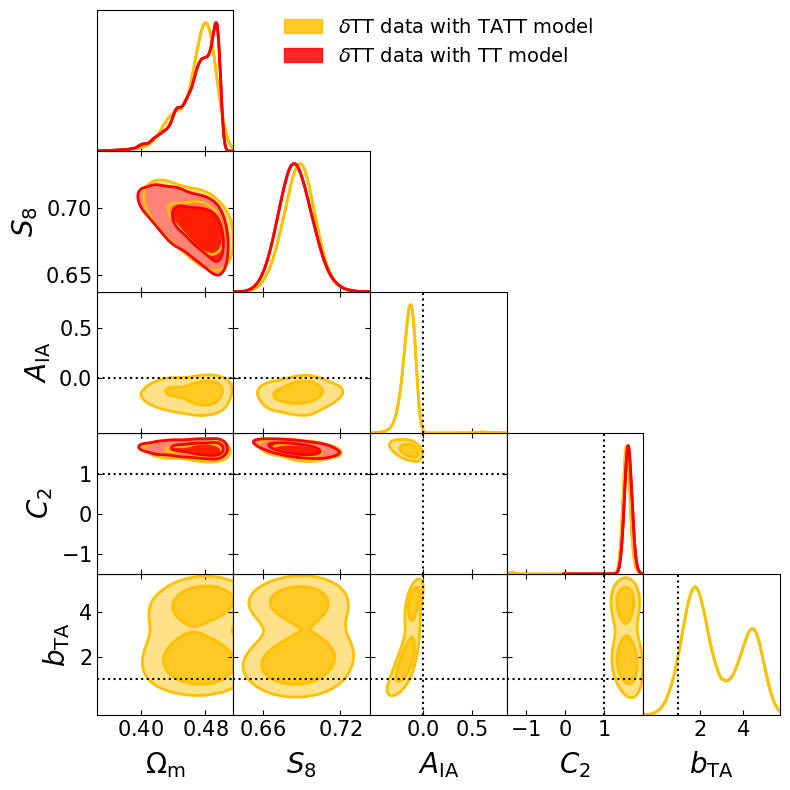

In [7]:
model1 = "deltaTT"  # define the first I model
model2 = "TATT"  # define the second IA model
model3 = "TT"
# Make a string we can pass around
model1_str = f"{model1}_with_{model3}"
model2_str = f"{model1}_with_{model2}"

# Make lists with samples and colors
samples_list = [samples[model2_str]] * 2 + [samples[model1_str]] * 2
colors_list = [colors[model2_str]] * 2 +  [colors[model1_str]] * 2

# Define kwargs
kwargs = {
        'contour_colors': colors_list,
        "filled": [False, True] * (len(colors_list)),
        "contour_ls": ["-"] * len(colors_list),
        "contour_lws": [2] * len(colors_list),
    }

# Set labels
legend_labels = ["_nolegend_",
                 f"$\delta$TT data with {model2} model",
                 "_nolegend_",
                 f"$\delta$TT data with TT model",
                 ]

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[model1_str],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model3}_and_{model2}_combo.pdf", dpi=300)
plt.savefig(f"{plot_path}{model1}_with_{model3}_and_{model2}_combo.png", dpi=300)


### HOD NLA model

Next, we investigate the HOD NLA model with the $\delta$NLA and TATT targets.

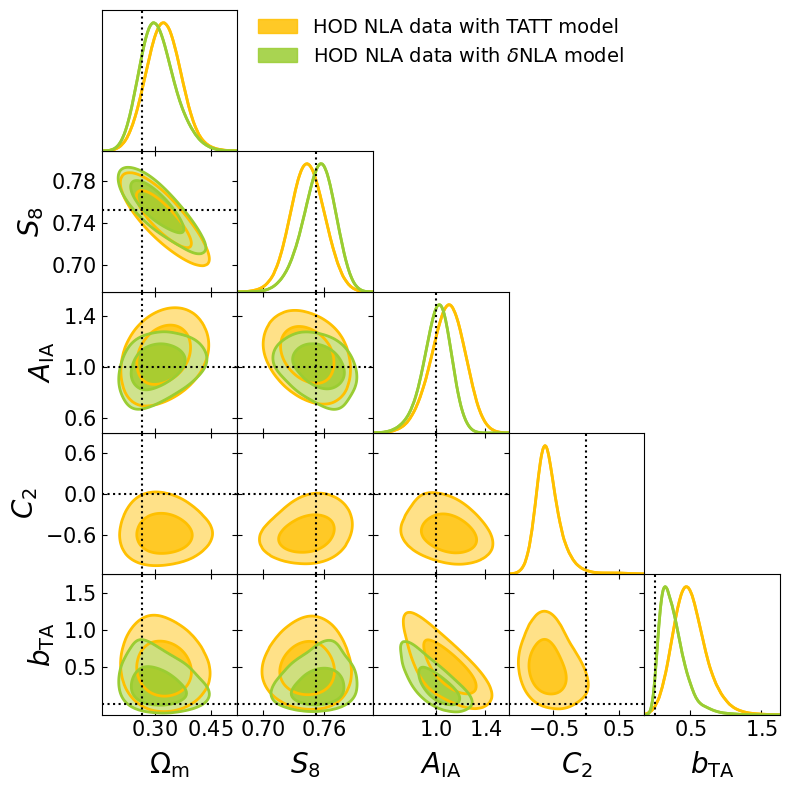

In [8]:
model1 = "HOD_NLA"  # define the first I model
model2 = "TATT"  # define the second IA model
model3 = "deltaNLA"
# Make a string we can pass around
model1_str = f"{model1}_with_{model3}"
model2_str = f"{model1}_with_{model2}"

# Make lists with samples and colors
samples_list = [samples[model2_str]] * 2 + [samples[model1_str]] * 2
colors_list = [colors[model2_str]] * 2 +  [colors[model1_str]] * 2

# Define kwargs
kwargs = {
        'contour_colors': colors_list,
        "filled": [False, True] * (len(colors_list)),
        "contour_ls": ["-"] * len(colors_list),
        "contour_lws": [2] * len(colors_list),
    }

# Set labels
legend_labels = ["_nolegend_",
                 f"HOD NLA data with {model2} model",
                 "_nolegend_",
                 f"HOD NLA data with $\delta$NLA model",
                 ]

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[model1_str],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model3}_and_{model2}_combo.pdf", dpi=300)
plt.savefig(f"{plot_path}{model1}_with_{model3}_and_{model2}_combo.png", dpi=300)


### HOD TT model

Finally, we explore the HOD TT model with the TT, $\delta$TT, and TATT targets.

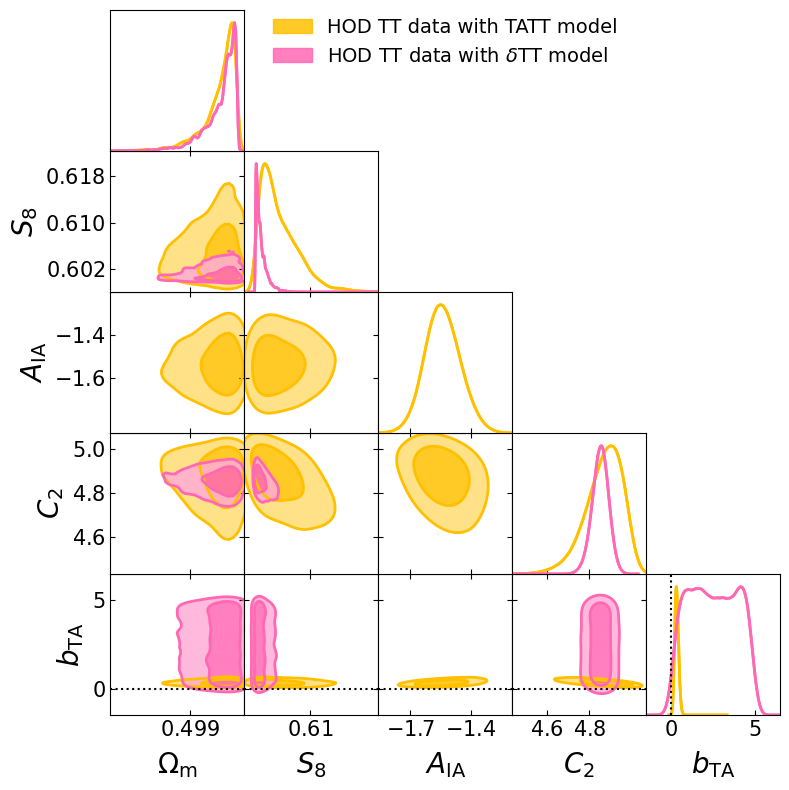

In [9]:
model1 = "HOD_TT"  # define the first I model
model2 = "TATT"  # define the second IA model
model3 = "deltaTT"
# Make a string we can pass around
model1_str = f"{model1}_with_{model3}"
model2_str = f"{model1}_with_{model2}"

# Make lists with samples and colors
samples_list = [samples[model2_str]] * 2 + [samples[model1_str]] * 2
colors_list = [colors[model2_str]] * 2 +  [colors[model1_str]] * 2

# Define kwargs
kwargs = {
        'contour_colors': colors_list,
        "filled": [False, True] * (len(colors_list)),
        "contour_ls": ["-"] * len(colors_list),
        "contour_lws": [2] * len(colors_list),
    }

# Set labels
legend_labels = ["_nolegend_",
                 f"HOD TT data with {model2} model",
                 "_nolegend_",
                 f"HOD TT data with $\delta$TT model",
                 ]

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[model1_str],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model3}_and_{model2}_combo.pdf", dpi=300)
plt.savefig(f"{plot_path}{model1}_with_{model3}_and_{model2}_combo.png", dpi=300)


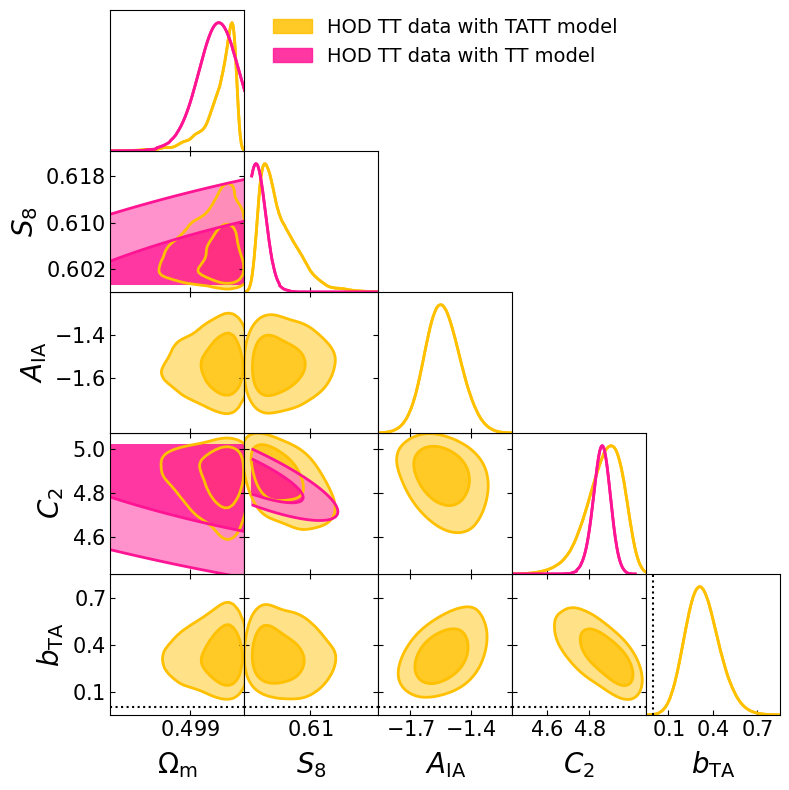

In [10]:
model1 = "HOD_TT"  # define the first I model
model2 = "TATT"  # define the second IA model
model3 = "TT"
# Make a string we can pass around
model1_str = f"{model1}_with_{model3}"
model2_str = f"{model1}_with_{model2}"

# Make lists with samples and colors
samples_list = [samples[model2_str]] * 2 + [samples[model1_str]] * 2
colors_list = [colors[model2_str]] * 2 +  [colors[model1_str]] * 2

# Define kwargs
kwargs = {
        'contour_colors': colors_list,
        "filled": [False, True] * (len(colors_list)),
        "contour_ls": ["-"] * len(colors_list),
        "contour_lws": [2] * len(colors_list),
    }

# Set labels
legend_labels = ["_nolegend_",
                 f"HOD TT data with {model2} model",
                 "_nolegend_",
                 f"HOD TT data with TT model",
                 ]

# Plot using getDist
g.triangle_plot(samples_list,
                markers=truth_values[model1_str],
                legend_labels=legend_labels,
                legend_ncol=1,
                **kwargs)

# Save the figs to pdf and png
plt.savefig(f"{plot_path}{model1}_with_{model3}_and_{model2}_combo.pdf", dpi=300)
plt.savefig(f"{plot_path}{model1}_with_{model3}_and_{model2}_combo.png", dpi=300)
